# Exploratory Data Analysis (EDA)
In this notebook, I load the raw dataset, inspect its structure, understand patterns, and identify data quality issues before preprocessing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization configuration for consistent and readable plots
plt.style.use("ggplot")
sns.set_theme(style="whitegrid", font_scale=1.1)

## 1. Load Dataset

In [3]:
# Load raw dataset
df = pd.read_csv("../data/raw/customer_churn_raw.csv")

# Standardize column names for consistency
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Preview the dataset
df.head()

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No


## 2. Dataset Structure and Overview

In this section, we examine the basic structure of the dataset, including its size, columns, and data types, to understand what information is available and identify potential data quality issues.

In [27]:
# Shape of the dataset
df.shape

(8453, 14)

In [28]:
# Column names
df.columns

Index(['PID', 'CRM_PID_Value_Segment', 'EffectiveSegment', 'Billing_ZIP',
       'KA_name', 'Active_subscribers', 'Not_Active_subscribers',
       'Suspended_subscribers', 'Total_SUBs', 'AvgMobileRevenue',
       'AvgFIXRevenue', 'TotalRevenue', 'ARPU', 'CHURN'],
      dtype='object')

In [29]:
# Dataset information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PID                     8453 non-null   object 
 1   CRM_PID_Value_Segment   8448 non-null   object 
 2   EffectiveSegment        8453 non-null   object 
 3   Billing_ZIP             8451 non-null   float64
 4   KA_name                 8453 non-null   object 
 5   Active_subscribers      8453 non-null   int64  
 6   Not_Active_subscribers  4304 non-null   float64
 7   Suspended_subscribers   352 non-null    float64
 8   Total_SUBs              8453 non-null   int64  
 9   AvgMobileRevenue        8453 non-null   float64
 10  AvgFIXRevenue           8453 non-null   float64
 11  TotalRevenue            8453 non-null   float64
 12  ARPU                    8452 non-null   float64
 13  CHURN                   8453 non-null   object 
dtypes: float64(7), int64(2), object(5)
memor

### Observations

1. **Missing Values**
   - `Not_Active_subscribers` and `Suspended_subscribers` contain a large number of missing values.
   - These missing values may represent customers with zero inactive or suspended subscriptions.
   - This will be addressed during preprocessing through appropriate imputation or feature evaluation.

2. **Target Variable Format**
   - `CHURN` is stored as an object (categorical) variable.
   - It will need to be converted into a numeric binary format (0 = No, 1 = Yes) for modeling.

3. **Identifier Column**
   - `PID` is a unique customer identifier.
   - It does not carry predictive value and will be excluded from model training.

## 3. Statistical Summary

This section provides a statistical overview of both numerical and categorical variables to understand central tendencies, variability, and potential irregularities in the dataset.

In [30]:
# Statistical summary of numerical and categorical features
df.describe(include="all")

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
count,8453,8448,8453,8451.000000,8453,8453.000000,4304.000000,352.000000,8453.000000,8453.000000,8453.000000,8453.000000,8452.000000,8453
unique,8436,9,6,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2.02E+12,Bronze,SOHO,NaN,VM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,5,3820,6301,NaN,769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7904
mean,NaN,NaN,NaN,4879.727725,NaN,7.774636,4.163336,1.576705,9.960132,148.011956,0.821185,148.833141,24.441789,NaN
std,NaN,NaN,NaN,1061.095394,NaN,6.680524,9.462847,1.979905,10.246648,102.570539,11.737880,103.250779,22.820585,NaN
min,NaN,NaN,NaN,1000.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.670000,0.000000,NaN
25%,NaN,NaN,NaN,4003.000000,NaN,4.000000,1.000000,1.000000,5.000000,71.500000,0.000000,71.830000,14.070000,NaN
50%,NaN,NaN,NaN,4400.000000,NaN,6.000000,2.000000,1.000000,7.000000,113.170000,0.000000,113.670000,19.315000,NaN
75%,NaN,NaN,NaN,6000.000000,NaN,10.000000,4.000000,1.000000,12.000000,191.170000,0.000000,192.330000,27.255000,NaN


### Observations

#### 1. Data Composition
- The dataset contains **8,453 customer records**.
- The target variable **CHURN is highly imbalanced**, with approximately **93% non-churn** and **7% churn** customers.
- This imbalance indicates the need for **class-balancing strategies** (e.g., class weights or resampling) during model training.

#### 2. Customer Segmentation
- A large proportion of customers belong to the **Bronze value segment** and **SOHO business category**.
- These dominant segments are likely to have a **strong influence on overall churn behavior** and business decisions.

#### 3. Revenue Patterns
- **Mobile services** contribute the majority of revenue, with a median **AvgMobileRevenue around 110–115**.
- **Fixed-line revenue** is zero for most customers, indicating a **mobile-centric customer base**.

#### 4. Outliers and Irregularities
- Several numerical features, such as **Active_subscribers**, **Not_Active_subscribers**, and **ARPU**, show extreme maximum values compared to their means.
- This suggests the presence of **outliers and right-skewed distributions**, which may require transformation or robust modeling techniques.

## 4. Missing Values Analysis

This section evaluates the extent and impact of missing values across features to inform appropriate data cleaning strategies.

In [31]:
# Count of missing values per column
df.isnull().sum()

PID                          0
CRM_PID_Value_Segment        5
EffectiveSegment             0
Billing_ZIP                  2
KA_name                      0
Active_subscribers           0
Not_Active_subscribers    4149
Suspended_subscribers     8101
Total_SUBs                   0
AvgMobileRevenue             0
AvgFIXRevenue                0
TotalRevenue                 0
ARPU                         1
CHURN                        0
dtype: int64

In [32]:
# Percentage of missing values per column
(df.isnull().sum() / len(df)) * 100

PID                        0.000000
CRM_PID_Value_Segment      0.059151
EffectiveSegment           0.000000
Billing_ZIP                0.023660
KA_name                    0.000000
Active_subscribers         0.000000
Not_Active_subscribers    49.083166
Suspended_subscribers     95.835798
Total_SUBs                 0.000000
AvgMobileRevenue           0.000000
AvgFIXRevenue              0.000000
TotalRevenue               0.000000
ARPU                       0.011830
CHURN                      0.000000
dtype: float64

### Observations

- The majority of **business-critical features** contain no missing values, indicating **overall good data quality**.
- Two variables show significantly high missingness:
  - **Not_Active_subscribers** → ~49% missing
  - **Suspended_subscribers** → ~96% missing

### Decision & Rationale

- Due to the **extremely high proportion of missing values**, especially in *Suspended_subscribers*, these features are likely to:
  - Contribute limited predictive value
  - Introduce noise or bias if imputed incorrectly
- Instead of performing blind imputation, these columns will be **evaluated and dropped** if they do not add meaningful information to churn prediction.

This approach helps:
- Preserve data integrity  
- Reduce model complexity  
- Prevent misleading patterns during training

## 5. Column Descriptions

This section provides a clear description of each feature in the dataset to ensure transparency and better understanding during analysis and modeling.

| Column Name | Description |
|------------|------------|
| **PID** | Unique identifier assigned to each customer (not used for modeling) |
| **CRM_PID_Value_Segment** | Customer value classification based on business metrics |
| **EffectiveSegment** | Customer’s active business or service segment |
| **Billing_ZIP** | Customer billing ZIP code |
| **KA_name** | Key Account name or customer group |
| **Active_subscribers** | Number of currently active subscriptions |
| **Not_Active_subscribers** | Number of inactive subscriptions |
| **Suspended_subscribers** | Number of temporarily suspended subscriptions |
| **Total_SUBs** | Total number of subscriptions associated with the customer |
| **AvgMobileRevenue** | Average monthly revenue generated from mobile services |
| **AvgFIXRevenue** | Average monthly revenue generated from fixed-line services |
| **TotalRevenue** | Total combined revenue across all services |
| **ARPU** | Average Revenue Per User |
| **CHURN** | Target variable indicating whether the customer churned (1 = Yes, 0 = No) |

## 6. Distribution and Correlation of Numerical Columns

This section analyzes the distribution, variability, outliers, and relationships of all numerical features to uncover patterns, segment customers, and identify potential predictors for churn.

### 6.1 Histograms of Numerical Features

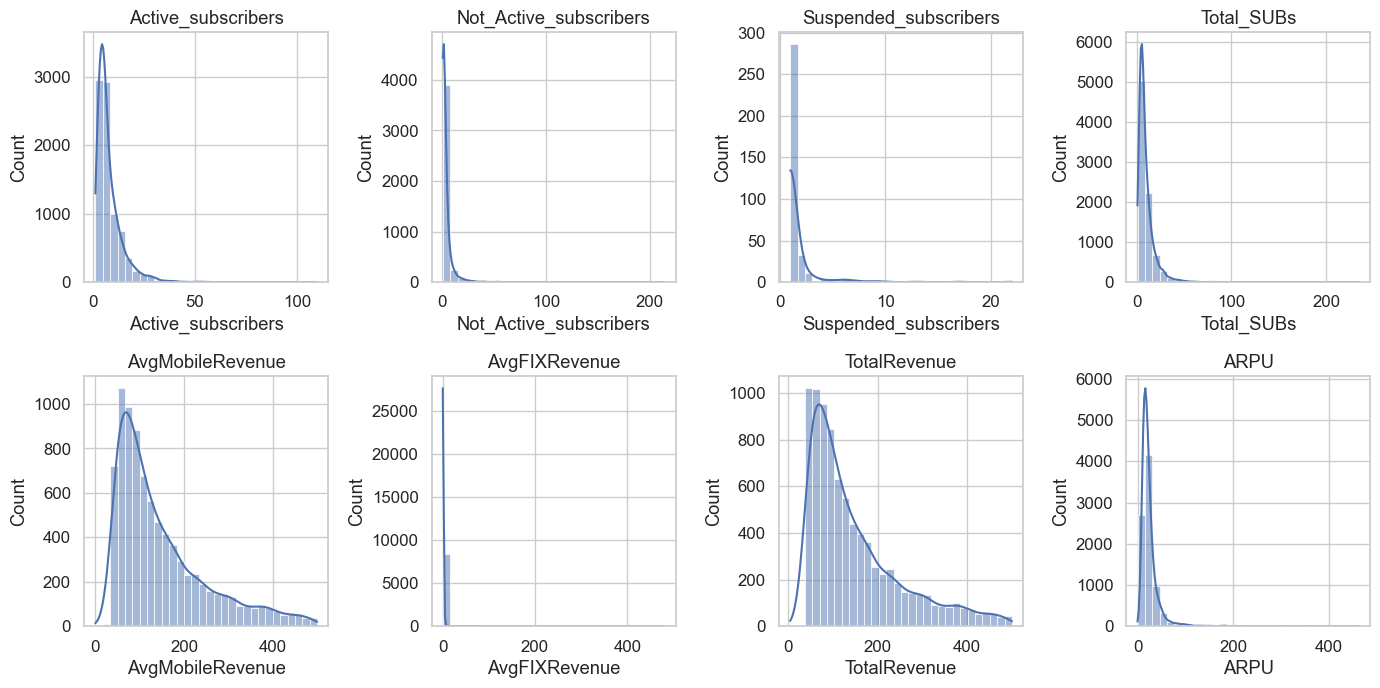

In [33]:
# Select numeric columns (exclude Billing_ZIP)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if col not in ['Billing_ZIP']]

# Plot histograms with KDE
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Histogram Observations

1. **Most Numerical Features Are Right-Skewed**
   - Subscriber counts and revenues are mostly low, with few very high values.
   - Right-skewness is suitable for **tree-based models** and segmentation analysis.

2. **AvgFIXRevenue Shows a Large Spike at Zero**
   - Many customers do not use fixed-line services.
   - Indicates a clear distinction between mobile-only and bundled users.

3. **Revenue Columns Have Good Variation**
   - Diverse spending patterns may strongly influence churn prediction.

4. **Outliers Are Present but Meaningful**
   - High-value customers create extreme values.
   - Tree models can handle these without removal.

### 6.2 Boxplots of Numerical Features

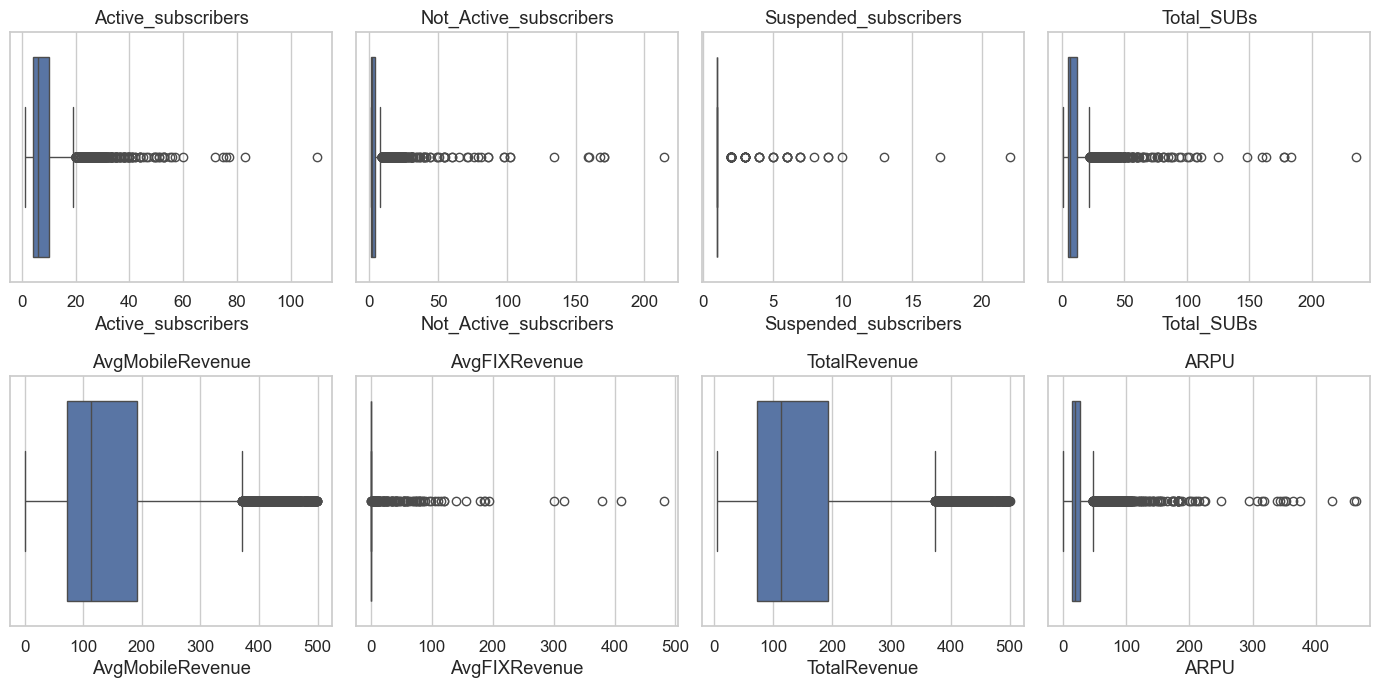

In [34]:
# Boxplots for outlier inspection
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Boxplot Observations (Outliers & Distribution Shape)

1. **Outliers in Subscriber Columns**
   - `Active_subscribers`, `Not_Active_subscribers`, `Suspended_subscribers`, `Total_SUBs` have points outside whiskers.
   - These are expected for enterprise/high-value customers.

2. **Revenue Columns Have Long Right-Tails**
   - `AvgMobileRevenue`, `TotalRevenue`, `ARPU` show extreme high-spending customers.
   - Outliers reflect real behavior; they will be **kept**.

3. **AvgFIXRevenue Mostly Zero**
   - Confirms low usage of fixed-line services among most customers.

4. **Suspended_subscribers Has Very Low Spread**
   - Limited variation; likely low predictive value.

5. **High Variability in Revenue Features**
   - Shows diversity of spending and potential segmentation opportunities.

### 6.3 Correlation Heatmap

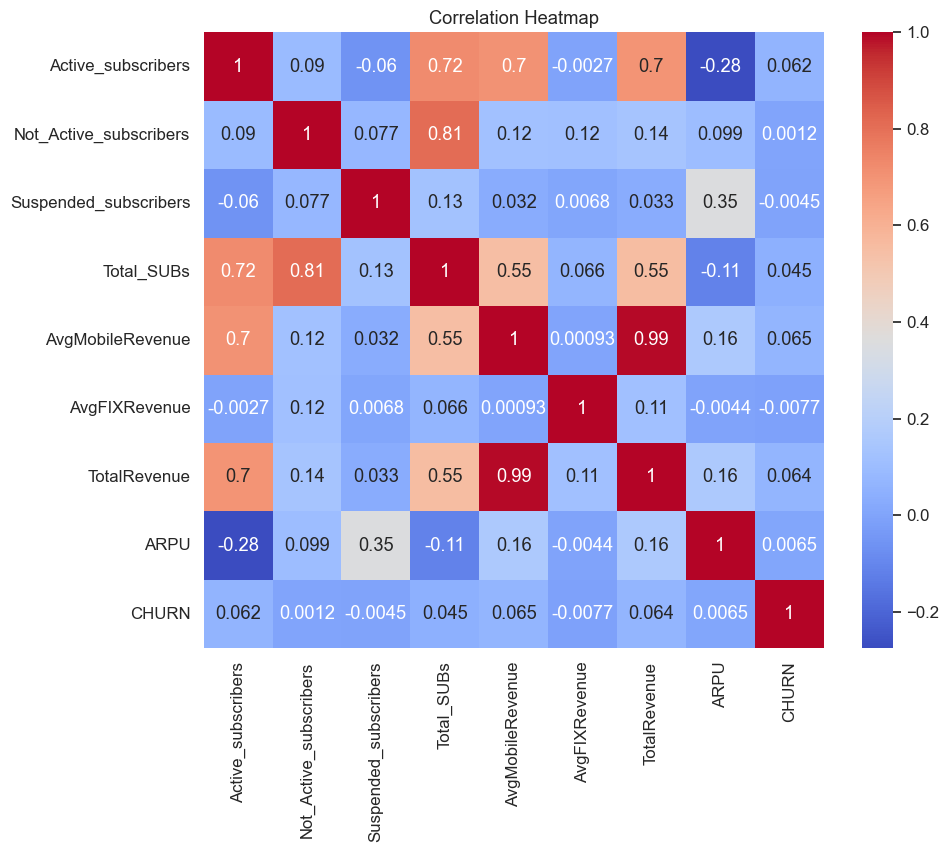

In [35]:
# Encode CHURN as numeric for correlation
df_heat = df.copy()
df_heat['CHURN'] = df_heat['CHURN'].astype('category').cat.codes  # Yes=1, No=0

plt.figure(figsize=(10, 8))
sns.heatmap(df_heat[num_cols + ['CHURN']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Observations

- **Strong Positive Correlations**
  - `Total_SUBs` ↔ `Not_Active_subscribers` (0.81)
  - `TotalRevenue` ↔ `AvgMobileRevenue` (0.99)
  - `Total_SUBs` ↔ `Active_subscribers` (0.72)

- **Moderate Correlations**
  - `TotalRevenue` ↔ `Total_SUBs` (0.55)
  - `AvgMobileRevenue` ↔ `Total_SUBs` (0.55)

- **Negative Correlations**
  - `ARPU` ↔ `Active_subscribers` (-0.28)

- **Weak Correlations**
  - `CHURN` has very low correlation with all numerical features, suggesting **non-linear dependencies** for churn prediction.

**Insight:** Subscriber counts and mobile revenue are key drivers of total revenue, while predicting churn may require **advanced models** to capture non-linear relationships.

## 7. Distribution of Categorical Columns
In this section, I analyze categorical variables to understand category dominance, imbalance, and the presence of rare values that may affect model performance.

### 7.1 EffectiveSegment Distribution

In [44]:
df['EffectiveSegment'].value_counts()

EffectiveSegment
SOHO     6301
VSE      1795
SME       284
SE         42
Other      29
LE          2
Name: count, dtype: int64

#### Observation
- The dataset is heavily dominated by the **SOHO** segment, followed by **VSE**.
- Several segments (**SE, Other, LE**) have very few observations.
- Such rare categories can lead to sparse dummy variables during encoding.

#### Planned Action
- Rare categories will be merged into a single **"OtherSegment"** group.
- One-Hot Encoding will be applied after consolidation to improve model stability.

### 7.2 CRM_PID_Value_Segment Distribution

In [45]:
df['CRM_PID_Value_Segment'].value_counts()

CRM_PID_Value_Segment
Bronze      3820
Silver      2039
Gold        1453
Platinum     537
SME          284
Iron         246
SE            41
Lead          27
Sliver         1
Name: count, dtype: int64

#### Observation
- Most customers belong to **Bronze, Silver, and Gold** segments.
- There are very rare categories such as **Lead, SE**, and a typographical error (**Sliver**).
- Rare and inconsistent categories can introduce noise and reduce generalization.

#### Planned Action
- Typographical inconsistencies (e.g., *Sliver → Silver*) will be corrected.
- Low-frequency categories will be merged into **"OtherSegment"**.
- Cleaned categorical features will then be **One-Hot Encoded** during preprocessing.

## 8. Target Variable Analysis: CHURN Distribution
In this section, I analyze the distribution of the target variable (**CHURN**) to understand class balance and its implications for model training.

In [46]:
df['CHURN'].value_counts(normalize=True) * 100

CHURN
No     93.505264
Yes     6.494736
Name: proportion, dtype: float64

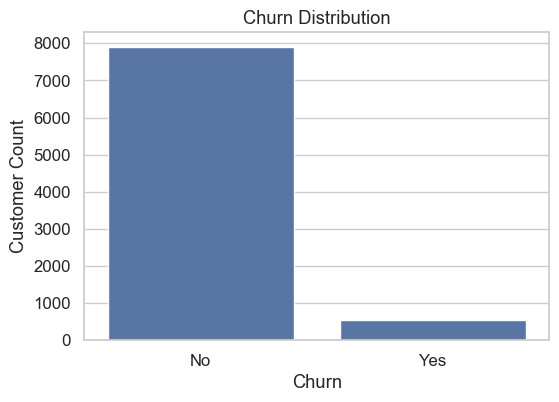

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='CHURN', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")

plt.savefig("../reports/figures/churn_distribution.png", bbox_inches="tight")
plt.show()

### Class Imbalance Observation

- The dataset contains approximately **93.5% non-churn** customers and **6.5% churn** customers.
- This represents a **significant class imbalance**, which is common in real-world churn prediction problems.
- Training a model without addressing this imbalance may lead to biased predictions favoring the majority class.

### Planned Mitigation Strategies:
- Apply **class-weight adjustments** in models such as Logistic Regression.
- Use **oversampling techniques** (e.g., **SMOTE**) for minority class balancing.
- Evaluate model performance using **precision, recall, F1-score, and ROC-AUC** instead of accuracy alone.

## 9. Bivariate Analysis

In this section, I analyze the relationship between individual features and the target variable (**CHURN**) to identify patterns, risk indicators, and potential predictors.

### 9.1. Bivariate Analysis - Numerical vs CHURN

#### 9.1.1 TotalRevenue vs CHURN

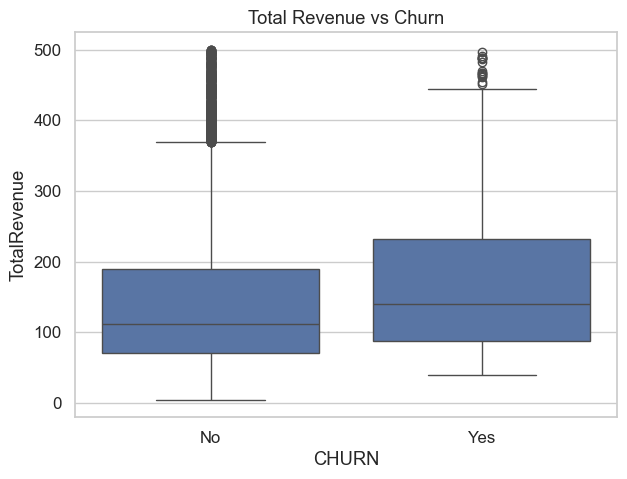

In [6]:
plt.figure(figsize=(7,5))
sns.boxplot(x='CHURN', y='TotalRevenue', data=df)
plt.title("Total Revenue vs Churn")

plt.savefig("../reports/figures/total_revenue_boxplot.png", bbox_inches="tight")
plt.show()

##### Observation
- Churned customers tend to generate **higher total revenue** compared to retained customers.
- Several **high-revenue customers are present in the churned group**, indicating loss of valuable customers.

##### Business Insight
- High revenue does **not guarantee customer loyalty**.
- Losing high-paying customers represents a **significant business risk**.
- Revenue alone is insufficient as a retention indicator.

#### 9.1.2 Active_subscribers vs CHURN

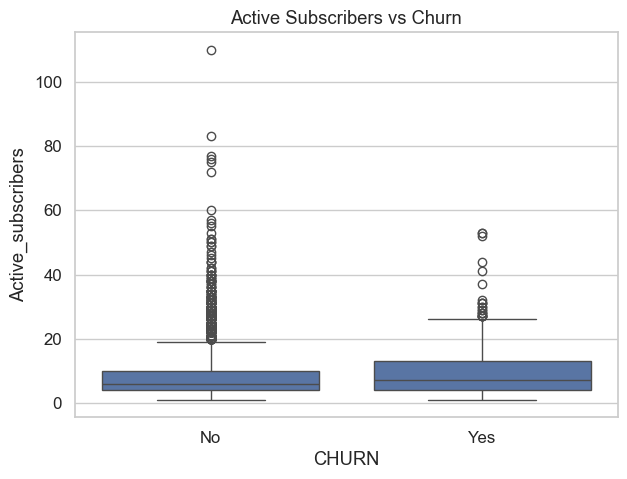

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(x='CHURN', y='Active_subscribers', data=df)
plt.title("Active Subscribers vs Churn")
plt.show()

##### Observation
- Churned customers generally have a **moderate number of active subscriptions**.
- Customers with **very high engagement (many active subscribers)** rarely churn.

##### Insight
- Medium-engagement customers (approximately 8–15 active subscriptions) show higher churn risk.
- Extremely engaged customers appear more loyal.
- This feature is useful for distinguishing churn-prone segments.

#### 9.1.3 AvgMobileRevenue vs CHURN

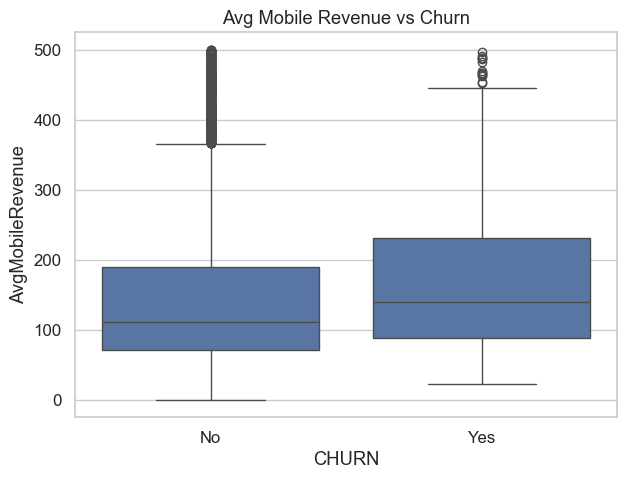

In [49]:
plt.figure(figsize=(7,5))
sns.boxplot(x='CHURN', y='AvgMobileRevenue', data=df)
plt.title("Avg Mobile Revenue vs Churn")
plt.show()

##### Observation
- Churned customers show a **higher median and upper range** of mobile revenue.
- High-paying mobile customers are more likely to churn.

##### Business Interpretation
- Higher mobile bills may lead to dissatisfaction or bill shock.
- Price-sensitive customers are at greater churn risk.

##### Conclusion
- AvgMobileRevenue is a **strong churn predictor**.

#### 9.1.4 AvgFIXRevenue vs CHURN

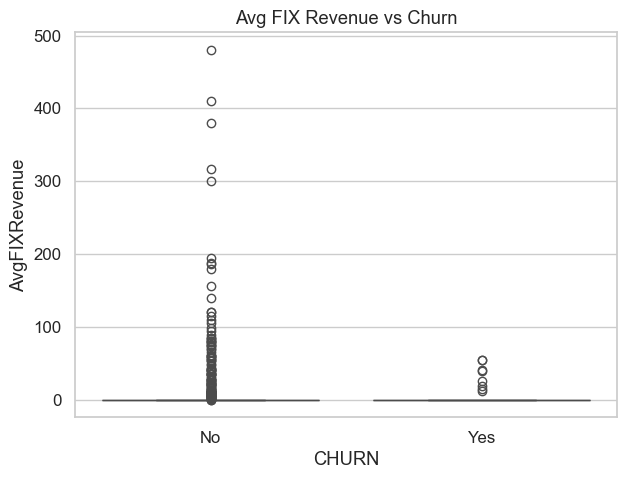

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(x='CHURN', y='AvgFIXRevenue', data=df)
plt.title("Avg FIX Revenue vs Churn")
plt.show()

##### Observation
- Most customers have **zero or very low FIX revenue**, indicating limited FIX service usage.
- Customers with **higher FIX revenue rarely churn**.

##### Insight
- FIX services appear to increase customer stickiness.
- High FIX users are **more loyal and stable**.

##### Conclusion
- AvgFIXRevenue is **not a churn driver**; instead, it indicates customer loyalty.

#### 9.1.5 ARPU vs CHURN

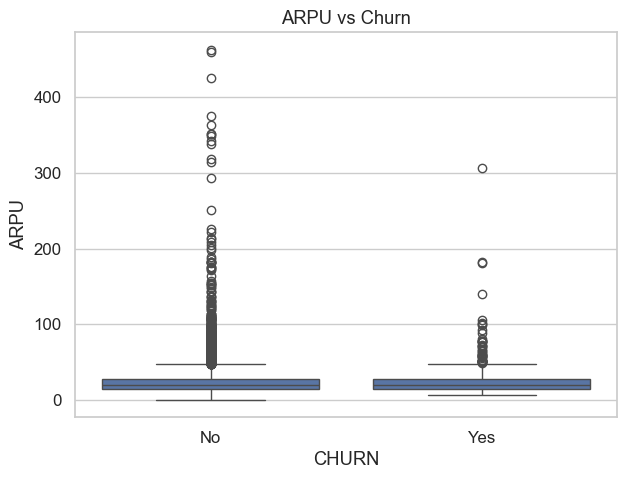

In [7]:
plt.figure(figsize=(7,5))
sns.boxplot(x='CHURN', y='ARPU', data=df)
plt.title("ARPU vs Churn")

plt.savefig("../reports/figures/arpu_boxplot.png", bbox_inches="tight")
plt.show()

##### Observation
- Customers with **higher ARPU tend to stay**.
- Lower ARPU customers are more likely to churn.

##### Interpretation
- Low ARPU users are less engaged and more price-sensitive.
- High ARPU customers are more invested and loyal.

##### Conclusion
- ARPU is a **strong indicator of customer retention**.

### 9.2 Bivariate Analysis – Categorical Features vs CHURN

#### 9.2.1 EffectiveSegment vs CHURN

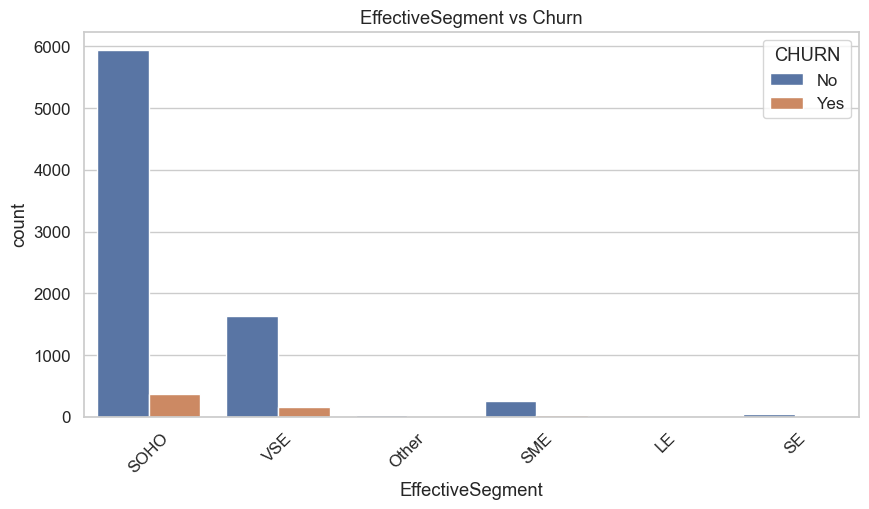

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='EffectiveSegment', hue='CHURN', data=df)
plt.title("EffectiveSegment vs Churn")
plt.xticks(rotation=45)
plt.show()

##### Observation
- Churn varies significantly across customer segments.
- SOHO and VSE segments show the highest churn counts, largely due to their large population size.
- Enterprise segments (SME, SE, LE) show **very low churn**, indicating strong retention.

##### Conclusion
- Customer churn is **segment-dependent**.
- EffectiveSegment is an important categorical predictor.

#### 9.2.2 CRM_PID_Value_Segment vs CHURN

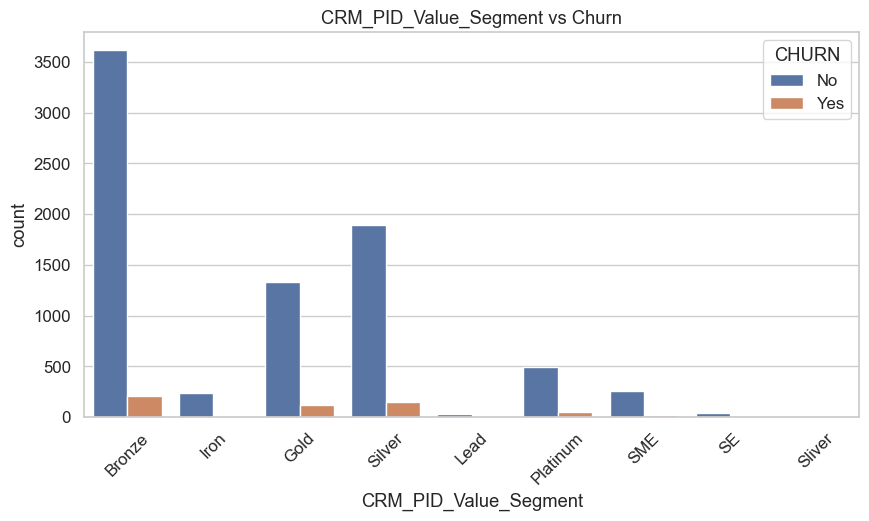

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='CRM_PID_Value_Segment', hue='CHURN', data=df)
plt.title("CRM_PID_Value_Segment vs Churn")
plt.xticks(rotation=45)
plt.show()

##### Observation
- High-value segments (Platinum, SME, SE) exhibit **near-zero churn**.
- Lower-value segments (Bronze, Silver, Gold) contribute most to churn.

##### Business Interpretation
- Lower-value customers are more price-sensitive and less loyal.
- High-value customers receive better engagement or services, leading to retention.

##### Conclusion
- CRM_PID_Value_Segment is a **critical business-driven churn indicator**.

## 10. Correlation Analysis for Numerical Features

In this section, I analyze correlations among numerical variables to understand feature relationships, detect redundancy, and identify variables that may influence churn indirectly.

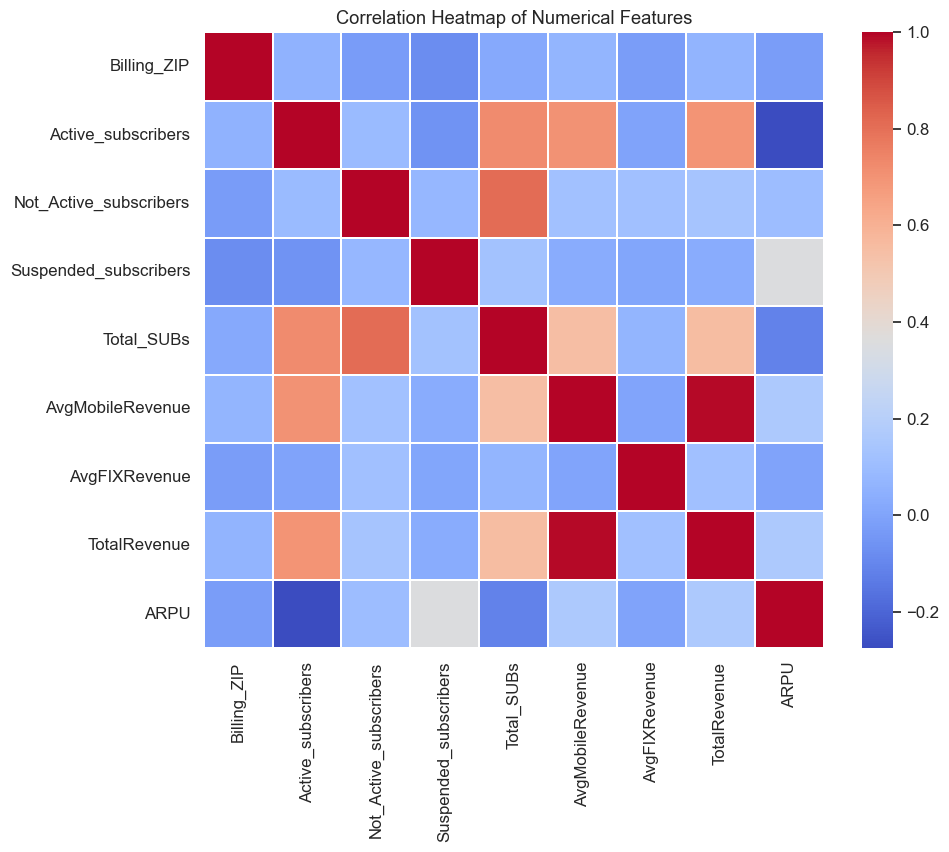

In [8]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")

plt.savefig("../reports/figures/numeric_correlation_heatmap.png", bbox_inches="tight")
plt.show()


### Key Observations

- **Strong Positive Correlations**
  - `TotalRevenue` shows a strong correlation with `AvgMobileRevenue` and `Active_subscribers`, indicating that highly engaged customers contribute the most financially.
  - `Total_SUBs` is positively correlated with both active and inactive subscriber counts, which is expected.

- **Moderate Relationships**
  - Revenue-related features show moderate correlation with subscriber counts, suggesting usage intensity drives revenue.

- **Low or Insignificant Correlations**
  - `Billing_ZIP` exhibits negligible correlation with revenue or subscriber metrics, indicating that geography does not play a major role in customer spending behavior.
  - `CHURN` does not show strong linear correlation with most numerical features, suggesting churn is influenced by **non-linear patterns** and interactions between features.

### Insights for Modeling
- Highly correlated features (e.g., `TotalRevenue` and `AvgMobileRevenue`) may introduce redundancy and will be handled carefully during feature selection.
- Low linear correlation with churn reinforces the need for **non-linear models** (e.g., Random Forest, Gradient Boosting).
- Correlation analysis helps prioritize **behavioral and revenue-based features** over location-based attributes.

## 11. Outlier Check

Outliers were analyzed for key revenue-related features to understand extreme customer behavior and assess whether these values represent noise or meaningful business cases.

### 11.1 TotalRevenue – Outlier Analysis

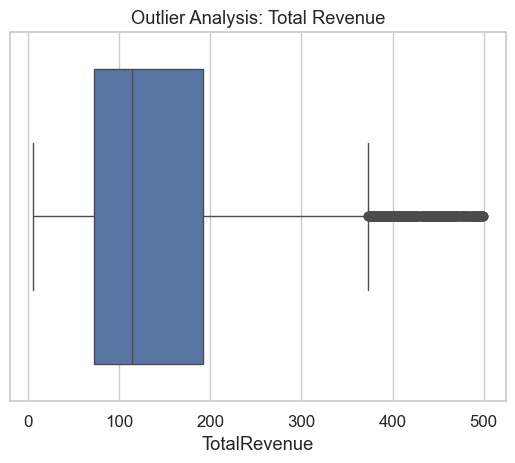

In [55]:
sns.boxplot(x=df['TotalRevenue'])
plt.title("Outlier Analysis: Total Revenue")
plt.show()

#### Observations

- The **TotalRevenue** distribution is strongly **right-skewed**.
- Most customers fall within a **moderate revenue range**.
- A small number of customers exhibit **very high total revenue**, appearing as outliers.
- These extreme values likely represent **high-value or enterprise customers**, not data errors.

**Business Insight:**  
High total revenue does not guarantee customer retention. Losing a small number of such customers can have a **significant impact on overall revenue**, making them strategically important for retention-focused strategies.


### 11.2 ARPU – Outlier Analysis

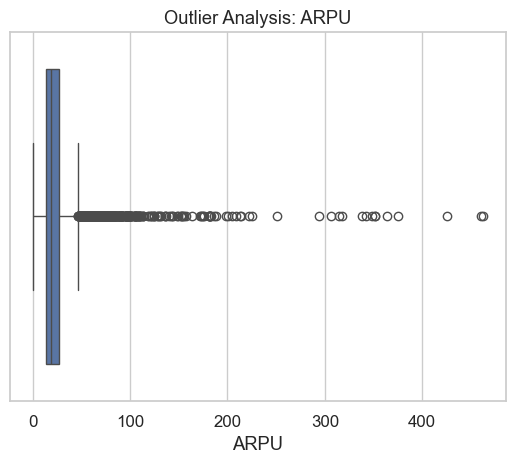

In [56]:
sns.boxplot(x=df['ARPU'])
plt.title("Outlier Analysis: ARPU")
plt.show()

#### Observations

- **ARPU** shows a highly **right-tailed (right-skewed) distribution**.
- The majority of customers fall into **low to moderate ARPU** ranges.
- A small segment of customers exhibits **exceptionally high ARPU**, indicating **premium or VIP users**.
- These outliers reflect **genuine customer behavior**, not data anomalies.

**Business Insight:**  
High-ARPU customers contribute **disproportionately to total revenue**. Churn within this segment would have a **significant financial impact**, making targeted retention strategies for these customers critically important.

## 12. Feature Engineering Opportunities Identified

Based on exploratory data analysis, several meaningful feature engineering opportunities were identified to improve churn prediction performance and model interpretability.

### 1. Binary Encoding of Target Variable
- The **CHURN** column will be converted from categorical (`Yes/No`) to numeric (`1/0`).
- This is required for machine learning algorithms and evaluation metrics.

---

### 2. Aggregation-Based Features
- **Total_SUBs** already combines active, inactive, and suspended subscriptions.
- Additional ratio-based features can provide deeper behavioral insights:
  - `Active_Ratio = Active_subscribers / Total_SUBs`
  - `Inactive_Ratio = Not_Active_subscribers / Total_SUBs`
- These ratios may better capture engagement intensity than raw counts.

---

### 3. Revenue Intensity Features
- Strong relationships were observed between:
  - `AvgMobileRevenue`, `TotalRevenue`, and `ARPU`
- Potential engineered features:
  - `Revenue_per_Subscription = TotalRevenue / Total_SUBs`
  - `Mobile_Revenue_Share = AvgMobileRevenue / TotalRevenue`
- These features help distinguish **high-spend but low-engagement** customers.

---

### 4. Handling Highly Skewed Numerical Features
- Many numerical variables are **right-skewed** with meaningful outliers.
- Planned transformations:
  - Log transformation (`log1p`) for:
    - `TotalRevenue`
    - `AvgMobileRevenue`
    - `ARPU`
- This stabilizes variance and improves model performance for linear models.

---

### 5. Categorical Feature Consolidation
- Rare categories were identified in:
  - `CRM_PID_Value_Segment`
  - `EffectiveSegment`
- Actions:
  - Merge infrequent categories into an **"Other"** group
  - Correct typographical inconsistencies
- This prevents sparse dummy variables after encoding.

---

### 6. One-Hot Encoding of Categorical Variables
- After cleaning and consolidation:
  - One-Hot Encoding will be applied to categorical columns.
- This allows models to learn segment-specific churn behavior.

---

### 7. Removal of Non-Predictive Identifiers
- **PID** is a unique identifier and carries no predictive value.
- It will be dropped before model training to avoid noise.

---

### 8. Dropping Low-Information Features
- Columns with extremely high missing values and low variability:
  - `Not_Active_subscribers`
  - `Suspended_subscribers`
- These will be removed after validation to reduce dimensionality and noise.

---

### 9. Class Imbalance Handling
- Churn is highly imbalanced (~6–7% churn rate).
- Planned solutions:
  - Class-weighted models
  - SMOTE or similar oversampling techniques
- This ensures the model learns churn patterns effectively.

---

### Summary
The engineered features focus on:
- **Customer engagement intensity**
- **Revenue concentration**
- **Behavioral segmentation**
- **Reducing noise and sparsity**

These enhancements are expected to significantly improve churn prediction accuracy and business interpretability.

## 13. Summary of EDA Findings

The exploratory data analysis (EDA) provided a comprehensive understanding of customer behavior, revenue patterns, and churn dynamics within the dataset. The key findings are summarized below:

### 1. Data Quality and Completeness
- Most business-critical variables were complete and reliable, indicating strong overall data quality.
- A small number of features contained extremely high missing values and were identified as low-informative for churn prediction.
- These features were flagged for removal to reduce noise and improve model generalization.

---

### 2. Customer Engagement Patterns
- The majority of customers maintain a relatively low to moderate number of active subscriptions.
- A smaller subset of customers shows significantly higher engagement, indicating heterogeneous usage behavior.
- Engagement-based features emerged as strong indicators of customer value and churn risk.

---

### 3. Revenue Distribution Insights
- Revenue-related variables (`TotalRevenue`, `AvgMobileRevenue`, `ARPU`) are heavily right-skewed.
- Most customers generate moderate revenue, while a small group contributes disproportionately high revenue.
- These high-value customers represent strategic business assets despite their low frequency.

---

### 4. Churn Characteristics
- The target variable (**CHURN**) is highly imbalanced, with churners forming a small minority.
- This highlights the importance of specialized handling techniques such as class-weighted models or oversampling.
- Simply optimizing for accuracy would be misleading in this context.

---

### 5. Categorical Feature Behavior
- Several categorical features contained rare or inconsistent categories.
- Cleaning and consolidation were necessary to prevent sparse encodings and unstable model behavior.
- Segment-based variables showed potential to capture meaningful churn-related patterns.

---

### 6. Feature Relationships
- Strong correlations were observed between:
  - Active subscriptions and total revenue
  - Mobile revenue and overall customer value
- Geographic identifiers showed negligible correlation with revenue and churn.
- This helped prioritize behavior-driven features over location-based attributes.

---

### 7. Outliers and Business Interpretation
- Outliers in revenue and ARPU represent genuine high-value customers rather than data errors.
- These customers warrant special attention, as their churn would have a disproportionate financial impact.
- Rather than removing outliers, they were retained for their business significance.

---

### 8. Modeling Implications
- EDA findings directly informed feature engineering decisions, including:
  - Ratio-based engagement features
  - Revenue normalization
  - Categorical consolidation
- The analysis ensured alignment between business understanding and machine learning readiness.

---

### Final Takeaway
This EDA established a strong foundation for predictive modeling by transforming raw data into meaningful business insights.  
The findings guided feature selection, preprocessing strategies, and modeling decisions, ensuring that the churn prediction model will be both **accurate** and **business-relevant**.